In [1]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns 
%matplotlib inline


In [4]:
df = pd.read_excel('./../results/merged_GCDT_blups.xlsx', sheet_name='Caribia', na_values=['NA', '.', ''])
pedigree = pd.read_csv('./../data/pedigree_GCDT.csv') 

df.head()

,Trait,Genotype,predicted.values,standard.errors
0,YdHa,AMADEUS,114.280,46.591
1,YdHa,DOR_390,138.076,46.583
2,YdHa,GCDT_001,136.333,43.448
3,YdHa,GCDT_002,128.627,46.346
4,YdHa,GCDT_003,121.878,43.439


In [8]:
pvDf = pd.pivot_table(columns='Trait', index='Genotype', values='predicted.values', data=df)
pvDf = pvDf.merge(pedigree[['Genotype', 'PopCode']], on='Genotype', how='left')



# Scatter Plots 

In [27]:
s1=30
s2=60
a1=0.6
a2=0.8

pedigree_style ={'G1':['#848fa5ff','s',s1,a1],
'G2':['#aa00d4ff','P',s1,a1],
'G3':['#e4ac2eff','P',s1,a1],
'G4':['#2b2d42ff','s',s1,a1],
'G5':['#3777ffff','P',s1,a1],
'G6':['#848fa5ff','P',s1,a1],
'G7':['#000000b4','P',s1,a1],
'G8':['#0b6e4fff','s',s1,a1],
'G9':['#c14952fe','s',s1,a1],
'G10':['#aa00d4ff','s',s1,a1],
'G11':['#91f5adff','s',s1,a1],
'G12':['#e4ac2eff','s',s1,a1],
'G13':['#3777ffff','s',s1,a1],
'G14':['#91f5adff','P',s1,a1],
'G40056':['#0b6e4fff','^',s2,a2],
'G40287':['#0b6e4fff','^',s2,a2],
 'G40001':['#0b6e4fff','^',s2,a2],
'INB_841':['#0b6e4fff','^',s2,a2],
'ICTA_LIGERO':['#c14953ff','^',s2,a2],
'SEF_010':['#c14953ff','^',s2,a2],
'SEN_118':['#c14953ff','^',s2,a2],
'SMC_214':['#c14953ff','^',s2,a2],
'SMR_155':['#c14953ff','^',s2,a2],
'VAP_001':['#c14953ff','^',s2,a2],
'AMADEUS':['#c14953ff','^',s2,a2],
'DOR_390':['#c14953ff','^',s2,a2],
'G40019':['#c14953ff','^',s2,a2],
'G40111':['#c14953ff','^',s2,a2],
'SEF_016':['#c14953ff','^',s2,a2],
'SEF_060':['#c14953ff','^',s2,a2],
'SEN_052':['#c14953ff','^',s2,a2],
'ROJO_SEDA':['#c14953ff','^',s2,a2],
'HTA_004':['#c14953ff','^',s2,a2],
'MAM_038':['#c14953ff','^',s2,a2],
'TIO_CANELA':['#c14953ff','^',s2,a2],
                
}
yAxis = {
    'NSV': '$Seed\ Number\ per\ pod\ (seeds\cdot pod^{-1})$',
    'PSN': '$Seed\ Number\ per\ pod\ (seeds\cdot pod^{-1})$',
    '100SW.1': '$Seed\ Weight\ (g\cdot100\ seeds^{-1})$',
    'X100SW.1':'$Seed\ Weight\ (g\cdot100\ seeds^{-1})$',
    'SW_100':'$Seed\ Weight\ (g\cdot100\ seeds^{-1})$',
    'YdHa': '$Yield\ per\ Hectare\ (Kg\cdot Ha^{-1})$',
    'YdPl': '$Yield\ per\ plant\ (g\cdot plant^{-1})$',
    'YdHa_verde': '$Yield\ per\ Hectare\ (Kg\cdot Ha^{-1})$',
    'PWW': '$Pod\ Wall\ Weight\ (g\cdot\ 10\ pods^{-1})$',
    'PHI': '$Pod\ Harvest\ Index\ (\%)$'
}


parents = pvDf[~pvDf.Genotype.str.startswith('GCDT')].Genotype.unique()

In [28]:
pvDf.loc[pvDf[pvDf['PopCode'].isna()].index,'PopCode'] = pvDf[pvDf['PopCode'].isna()]['Genotype']

# Selection Index

In [78]:
from sklearn import preprocessing

RILS = pvDf[pvDf.Genotype.str.startswith('GCDT')]
RILS = RILS.fillna(RILS.mean())
X = RILS[['YdHa', 'YdPl','PHI']].to_numpy()
scaler = preprocessing.StandardScaler().fit(X)
print('Mean Values:')
print(scaler.mean_)
X_scaled = scaler.transform(X)
heritabilities = np.array([0.29, 0.15, 0.66])
weights = np.array([0.6, 0.1, 0.3])
selectionIndex = np.sum(X_scaled*heritabilities*weights, axis=1)
RILS['selection_index'] = selectionIndex

Mean Values:
[135.49410106   2.38457979  67.9682246 ]


In [79]:
selectionIndex = RILS.sort_values('selection_index', ascending=False)

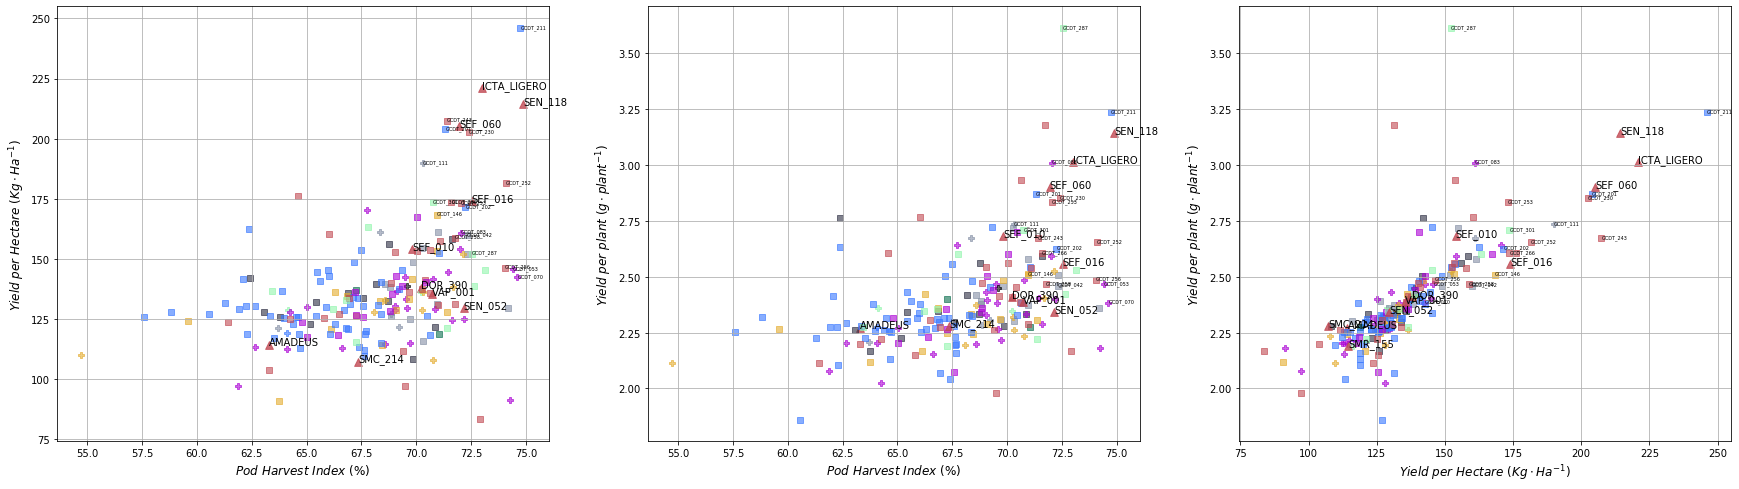

In [83]:
w = 10*3
h = 8
fig, axs = plt.subplots(1,3,figsize=(w,h))
axs = axs.flatten()

plots = [['PHI', 'YdHa'],['PHI', 'YdPl'],['YdHa', 'YdPl']]

for comb,ax in zip(plots,axs):
    data = pvDf.dropna(subset=comb)
    for i, row in data.iterrows():
        x =row[comb[0]]
        y =row[comb[1]]
        ax.scatter(x=x,
                   y=y,
                   marker=pedigree_style[row['PopCode']][1], 
                   c=pedigree_style[row['PopCode']][0], 
                   s=pedigree_style[row['PopCode']][2],
                   label=row['PopCode'],
                  alpha=pedigree_style[row['PopCode']][3])
        if row['Genotype'] in parents:
            ax.text(x,y, row['Genotype'])
            
        if row['Genotype'] in selectionIndex.head(n=int(selectionIndex.shape[0]*0.1))['Genotype'].tolist():
            ax.text(x,y, row['Genotype'], size=5)
        
    ax.set_xlabel(yAxis[comb[0]],size=12)
    ax.set_ylabel(yAxis[comb[1]],size=12)
    ax.grid()
    #ax.title('BLUPs %s & %s: Caribia 2021A'%comb)
    
plt.savefig('./../results/Caibia_scatter.png')

In [81]:
popCodePed = pd.read_csv('./../data/popCode_pedigree.csv') 
best = selectionIndex.head(n=int(selectionIndex.shape[0]*0.1))
best = best.merge(popCodePed, on='PopCode')
counts = best.groupby('family',as_index=False).count()
means = best.groupby('family').mean()

In [82]:
means.merge(counts[['family', 'Genotype']], on='family')

,family,PHI,YdHa,YdPl,selection_index,Genotype
0,((VAP 1xG 40056)F1 X SEN 118)F1 X ICTA LIGERO,72.322000,159.810000,2.460000,0.456277,1
1,((VAP 1xG 40056)F1 X SEN 118)F1 X SEF 10,73.683000,149.727333,2.620667,0.460966,3
2,((VAP 1xG 40287)F1 X ICTA LIGERO)F1 X SEF 10,70.294000,189.860000,2.736000,0.609768,1
3,((VAP 1xG 40287)F1 X SEF 10)F1 X ICTA LIGERO,72.476286,177.648571,2.653429,0.626948,7
4,((VAP 1xG 40287)F1 X SEF 10)F1 X SEN 118,71.637500,162.869500,3.161000,0.490691,2
5,((VAP 1xG 40287)F1 X SEF 10)F1 X SMC 214,70.942000,168.330000,2.510000,0.451909,1
6,((VAP 1xG 40287)F1 X SEF 10)F1 X SMR 155,72.770000,207.107000,2.910333,0.906734,3


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


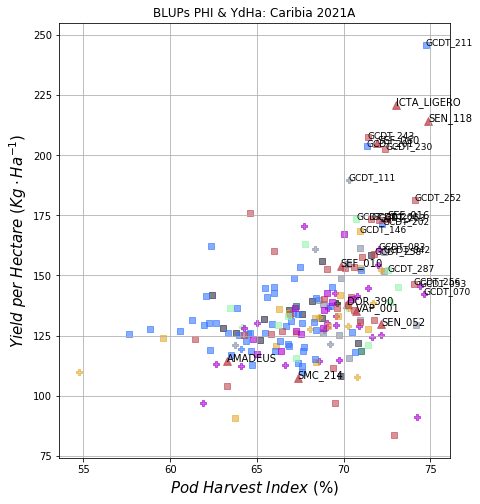

In [92]:

fig = plt.figure(figsize=(7,8))
ax = fig.add_subplot(111)
for i, row in pvDf.iterrows():
    x =row['PHI']
    y =row['YdHa']
    ax.scatter(x=x,
               y=y,
               marker=pedigree_style[row['PopCode']][1], 
               c=pedigree_style[row['PopCode']][0], 
               s=pedigree_style[row['PopCode']][2],
               label=row['PopCode'],
              alpha=pedigree_style[row['PopCode']][3])
    if row['Genotype'] in parents:
        ax.text(x,y, row['Genotype'])
        
    if row['Genotype'] in selectionIndex.head(n=int(selectionIndex.shape[0]*0.1))['Genotype'].tolist():
            ax.text(x,y, row['Genotype'], size=9)
            
ax.set_xlabel(yAxis['PHI'],size=15)
ax.set_ylabel(yAxis['YdHa'],size=15)
ax.grid()
ax.set_title('BLUPs PHI & YdHa: Caribia 2021A')

plt.savefig('./../results/Caibia_scatter.png')